# **Introduction**

Description: The dataset used for predictive modelling was generated by the Wild Blueberry Pollination Simulation Model, which is an open-source, spatially-explicit computer simulation program, that enables exploration of how various factors, including plant spatial arrangement, outcrossing and self-pollination, bee species compositions and weather conditions, in isolation and combination, affect pollination efficiency and yield of the wild blueberry agro-ecosystem. The simulation model has been validated by the field observation and experimental data collected in Maine USA and Canadian Maritimes during the last 30 years and now is a useful tool for hypothesis testing and theory development for wild blueberry pollination researches. This simulated data provides researchers who have actual data collected from field observation and those who wants to experiment the potential of machine learning algorithms response to real data and computer simulation modelling generated data as input for crop yield prediction models.

### **Aim of the model**

The target feature is **yield** which is a continuous variable. The task is to classify this variable based on the other 17 features step-by-step by going through each day's task. The evaluation metrics will be RMSE score


# **Importing libraries**

We will first have a section where we will import required libraries for our model building. Each time a new library is required to be built we will come to this section and code. This will help us have consolidated list of libraries which can be used for future reference as well 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.feature_selection import SelectKBest, f_regression # for feature selection using regression
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor # for Tree based method of feature selection or for regression solution for continuous variables prediction
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import xgboost 
from xgboost import XGBRegressor
from sklearn.model_selection import KFold, cross_val_score # for model evaluation
import shapely, shap # for Explainable AI
shap.initjs()
import streamlit as st

# **Accessing and reading the dataset**

In order to start working on data, we need to access and get the dataset read.

In [2]:
wild_blueberry_yield_df = pd.read_csv("WildBlueberryPollinationSimulationData.csv")
wild_blueberry_yield_df.sample(10)

,Row#,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
761,761,20.0,6.64,0.00,0.00,0.00,86.0,52.0,71.9,62.0,30.0,50.8,3.77,0.06,0.508675,0.336240,24.601741,4936.364770
133,133,12.5,0.25,0.25,0.38,0.25,94.6,57.2,79.0,68.2,33.0,55.9,16.00,0.26,0.500438,0.444588,35.384612,5643.360448
263,263,12.5,0.25,0.25,0.63,0.50,86.0,52.0,71.9,62.0,30.0,50.8,24.00,0.39,0.532628,0.460286,37.191036,6255.890642
460,460,25.0,0.50,0.25,0.38,0.50,94.6,57.2,79.0,68.2,33.0,55.9,1.00,0.10,0.477832,0.439279,34.878927,5524.145415
620,620,25.0,0.50,0.25,0.75,0.63,94.6,57.2,79.0,68.2,33.0,55.9,1.00,0.10,0.507116,0.451013,36.148782,6315.233209
575,575,25.0,0.50,0.25,0.63,0.63,94.6,57.2,79.0,68.2,33.0,55.9,24.00,0.39,0.383582,0.395503,30.274972,3948.986911
68,68,12.5,0.25,0.25,0.25,0.38,86.0,52.0,71.9,62.0,30.0,50.8,1.00,0.10,0.587049,0.492820,41.135893,7267.283440
484,484,25.0,0.50,0.25,0.38,0.63,69.7,42.1,58.2,50.2,24.3,41.2,1.00,0.10,0.460821,0.405976,32.680398,5628.882801
166,166,12.5,0.25,0.25,0.38,0.50,94.6,57.2,79.0,68.2,33.0,55.9,1.00,0.10,0.565086,0.476589,39.091856,6822.971627
200,200,12.5,0.25,0.25,0.38,0.75,86.0,52.0,71.9,62.0,30.0,50.8,34.00,0.56,0.490321,0.441302,35.094733,5601.205307


# Copy of dataset

In order to main tain a backup for original data, it is advisable to maintain a make a deep copy of the same. 

Proceeding we will use this copy as we progress in our project development.

In [3]:
wild_blueberry_yield_df1 = wild_blueberry_yield_df.copy(deep= True)
wild_blueberry_yield_df1.sample(5)

,Row#,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
330,330,12.5,0.25,0.25,0.75,0.63,94.6,57.2,79.0,68.2,33.0,55.9,34.0,0.56,0.429211,0.409977,31.574108,4580.392997
544,544,25.0,0.50,0.25,0.50,0.75,94.6,57.2,79.0,68.2,33.0,55.9,34.0,0.56,0.334594,0.377566,28.282868,3244.329258
348,348,12.5,0.25,0.25,0.75,0.75,77.4,46.8,64.7,55.8,27.0,45.8,1.0,0.10,0.596036,0.492749,40.998504,7706.881369
273,273,12.5,0.25,0.25,0.63,0.50,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.505120,0.425220,34.797819,6187.951881
237,237,12.5,0.25,0.25,0.50,0.63,69.7,42.1,58.2,50.2,24.3,41.2,16.0,0.26,0.534126,0.441974,36.751396,6731.712208


# Exploratory Data Analysis

This is an  important step where we explore and get valuable insights of the available data. This will show a pathway in building a model.

Reference : https://www.analyticsvidhya.com/blog/2022/07/step-by-step-exploratory-data-analysis-eda-using-python/

### **1.Retrieving basic details**

We will use `df.info()` to know basic details such as shape of dataset, data types of various features, if any null values, etc. 

In [4]:
display("Basic details of the dataset: ", wild_blueberry_yield_df1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Row#                  777 non-null    int64  
 1   clonesize             777 non-null    float64
 2   honeybee              777 non-null    float64
 3   bumbles               777 non-null    float64
 4   andrena               777 non-null    float64
 5   osmia                 777 non-null    float64
 6   MaxOfUpperTRange      777 non-null    float64
 7   MinOfUpperTRange      777 non-null    float64
 8   AverageOfUpperTRange  777 non-null    float64
 9   MaxOfLowerTRange      777 non-null    float64
 10  MinOfLowerTRange      777 non-null    float64
 11  AverageOfLowerTRange  777 non-null    float64
 12  RainingDays           777 non-null    float64
 13  AverageRainingDays    777 non-null    float64
 14  fruitset              777 non-null    float64
 15  fruitmass             7

'Basic details of the dataset: '

None

**Observation**

We see that there are no null values and all data types used are calculation friendly. Here we need to check if the data is categorical or numerical.


### **2.Checking for duplicate values**

In order to test our above statement we will use `df.duplicate()` to know if any duplicate value.

We shall use`df.nunique`. This will help us know if data is numerical or categorical.

In [5]:
display("Count of duplicate values: ",wild_blueberry_yield_df1.duplicated().sum())

'Count of duplicate values: '

0

In [6]:
display("Count of unique values: ", wild_blueberry_yield_df1.nunique())

'Count of unique values: '

Row#                    777
clonesize                 6
honeybee                  7
bumbles                  10
andrena                  12
osmia                    12
MaxOfUpperTRange          5
MinOfUpperTRange          5
AverageOfUpperTRange      5
MaxOfLowerTRange          5
MinOfLowerTRange          5
AverageOfLowerTRange      5
RainingDays               5
AverageRainingDays        5
fruitset                777
fruitmass               777
seeds                   777
yield                   777
dtype: int64

**Observation**

From the above we can know that 
- most data is categorical while few vectors contain numerical data.
- Our target variable, **"yield"** has each value unique (length of dataset = number of unique values of the target vector.) 
- Also we can drop the **Row#** column as it seems to be the same as the index number.

### **3. Knowing some basic statistics**

It is a good practice to know some basic statistics of the dataset. For this usage of `df.describe(include ="all")` is a great option. This will give us information on mean, range, percentiles, etc. As we have categorical data we are passing the *include = "all"* argument.

In [7]:
wild_blueberry_yield_df1.describe(include = "all").T

,count,mean,std,min,25%,50%,75%,max
Row#,777.0,388.000000,224.444871,0.000000,194.000000,388.000000,582.000000,776.000000
clonesize,777.0,18.767696,6.999063,10.000000,12.500000,12.500000,25.000000,40.000000
honeybee,777.0,0.417133,0.978904,0.000000,0.250000,0.250000,0.500000,18.430000
bumbles,777.0,0.282389,0.066343,0.000000,0.250000,0.250000,0.380000,0.585000
andrena,777.0,0.468817,0.161052,0.000000,0.380000,0.500000,0.630000,0.750000
osmia,777.0,0.562062,0.169119,0.000000,0.500000,0.630000,0.750000,0.750000
MaxOfUpperTRange,777.0,82.277091,9.193745,69.700000,77.400000,86.000000,89.000000,94.600000
MinOfUpperTRange,777.0,49.700515,5.595769,39.000000,46.800000,52.000000,52.000000,57.200000
AverageOfUpperTRange,777.0,68.723037,7.676984,58.200000,64.700000,71.900000,71.900000,79.000000
MaxOfLowerTRange,777.0,59.309395,6.647760,50.200000,55.800000,62.000000,66.000000,68.200000


### **4.Understanding target variable**

Our target feature here is **yield**. Lack of understanding of our output feature will hamper the process of the project. Thus, it is important for us to know some details of the same.

From the `df.nunique()` we have seen that `len(df) = df["yield].nunique()`. This is good enough for us to understand that our output variable hasdistinct values and is a continuous variable.

In [8]:
# display("Target variable in figures: ", wild_blueberry_yield_df1["yield"].value_counts())
# display("Total observations: ", len(wild_blueberry_yield_df1["yield"]))
# plt.bar(wild_blueberry_yield_df1["yield"].value_counts(),height= 7)
# display("Percentage of the figures in the target variable: ", (wild_blueberry_yield_df1["yield"].value_counts()/len(wild_blueberry_yield_df1["yield"]))*100)
# plt.show;


**Observation**

- We have one unique value for each observation, which means data is numerical.
- The data is already balanced so we do not have to upsample data.

**1. Dropping few columns**

We will drop the very first column **Row#** as it is a repetitive of the index number

*Reference : https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html*

In [8]:
wild_blueberry_yield_df1.drop(labels = "Row#", axis= 1, inplace= True)
wild_blueberry_yield_df1.sample(10)

,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
311,12.5,0.250,0.250,0.750,0.500,86.0,52.0,71.9,62.0,30.0,50.8,24.00,0.39,0.544067,0.464562,37.678285,6514.638993
450,12.5,0.250,0.380,0.500,0.750,69.7,42.1,58.2,50.2,24.3,41.2,34.00,0.56,0.504853,0.430359,35.513713,5971.394016
86,12.5,0.250,0.250,0.250,0.500,94.6,57.2,79.0,68.2,33.0,55.9,1.00,0.10,0.573428,0.483047,39.929720,7122.490558
675,25.0,0.500,0.380,0.380,0.630,69.7,42.1,58.2,50.2,24.3,41.2,16.00,0.26,0.499993,0.431449,35.558911,6491.223531
773,40.0,0.537,0.117,0.409,0.058,86.0,52.0,71.9,62.0,30.0,50.8,3.77,0.06,0.342841,0.377915,28.462005,3373.436842
573,25.0,0.500,0.250,0.630,0.630,86.0,52.0,71.9,62.0,30.0,50.8,24.00,0.39,0.454725,0.427938,33.558134,5046.457343
240,12.5,0.250,0.250,0.500,0.630,77.4,46.8,64.7,55.8,27.0,45.8,34.00,0.56,0.561297,0.475425,38.934512,6735.243710
719,25.0,0.500,0.380,0.500,0.630,94.6,57.2,79.0,68.2,33.0,55.9,24.00,0.39,0.425493,0.418732,32.856419,4575.769909
309,12.5,0.250,0.250,0.750,0.500,94.6,57.2,79.0,68.2,33.0,55.9,16.00,0.26,0.565819,0.476002,39.046593,6806.492688
283,12.5,0.250,0.250,0.630,0.630,77.4,46.8,64.7,55.8,27.0,45.8,16.00,0.26,0.583379,0.484792,40.037644,7425.751937


### **Feature analysis using subplots**

**Univariate Analaysis**

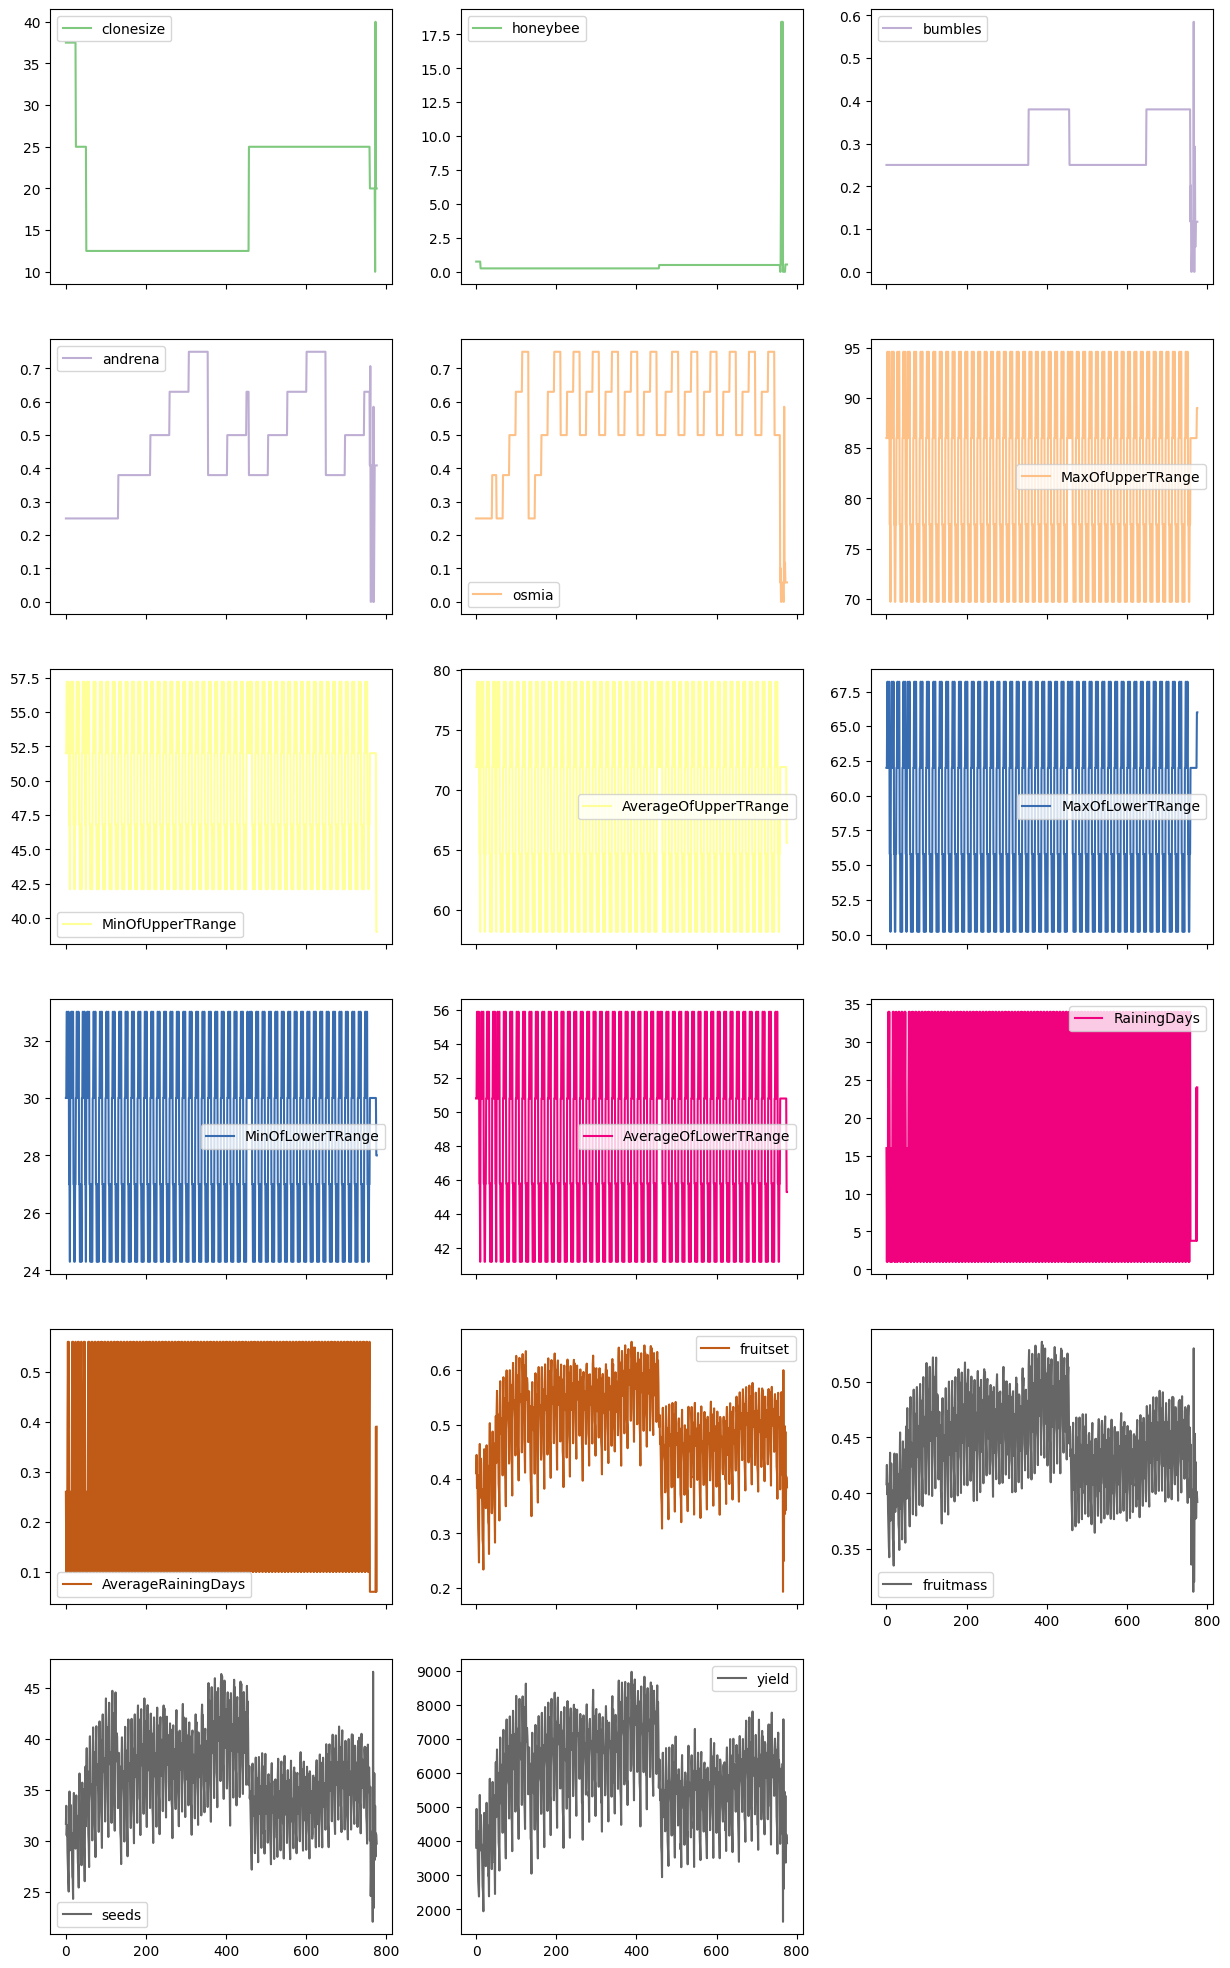

In [9]:
#  Checking distribution for each variable using subplots 
wild_blueberry_yield_df1.plot(figsize = (15,25), subplots = True, layout= (6,3), cmap = "Accent");

**Multivariate Analaysis**

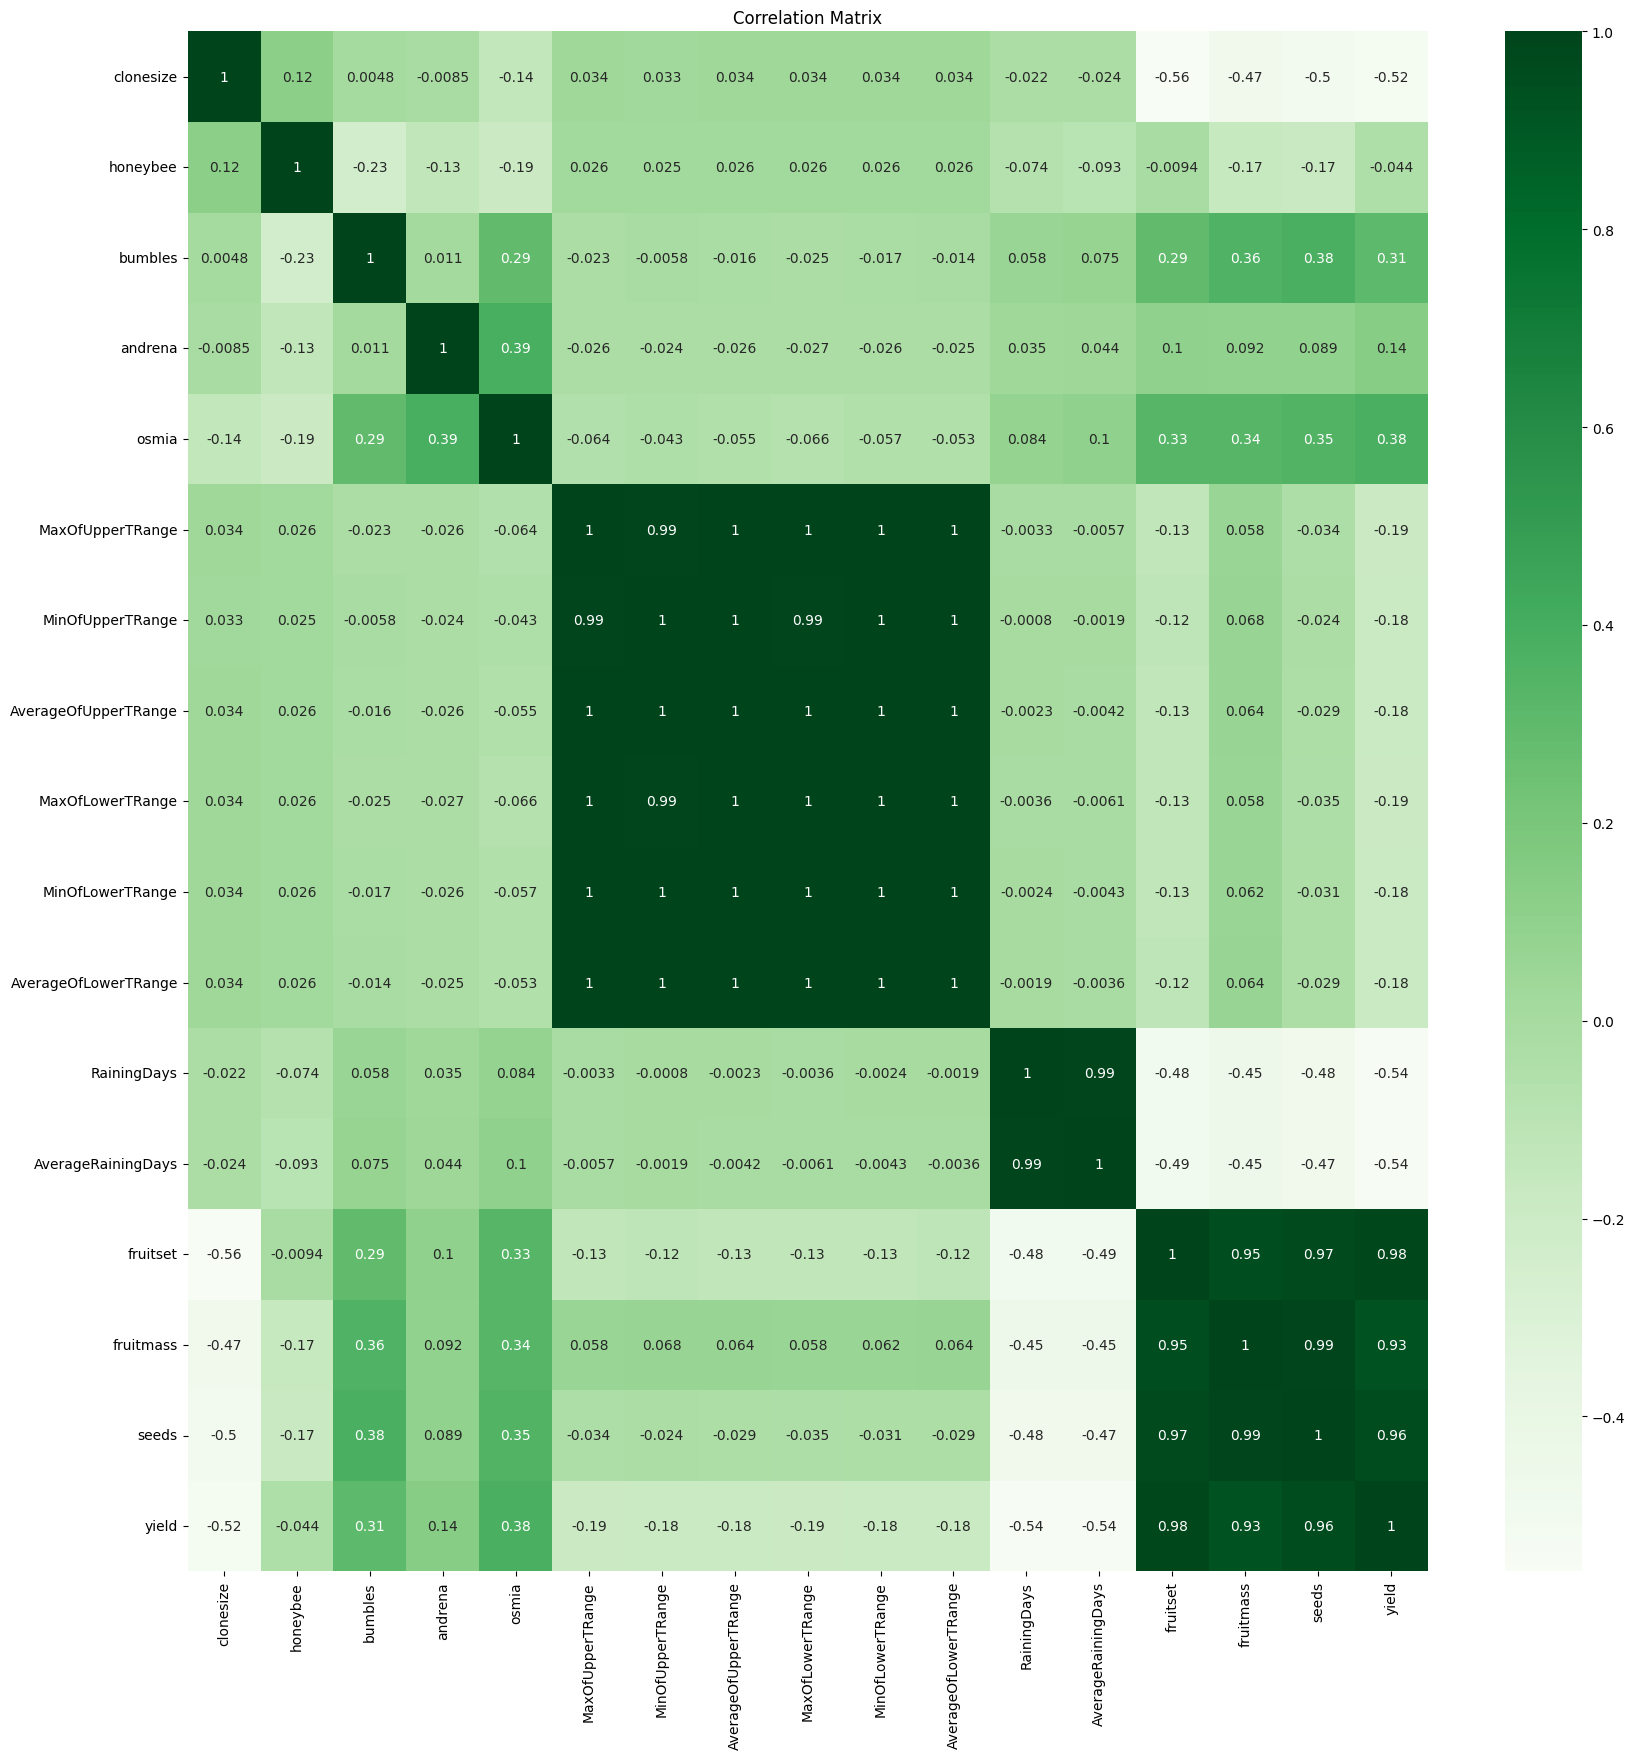

In [10]:
# Correlation heatmap
# Reference : https://www.statology.org/seaborn-heatmap-size/

plt.subplots(figsize = (20,20)) 
sns.heatmap(wild_blueberry_yield_df1.corr(method= "pearson"), annot= True, cmap= "Greens",)
plt.title("Correlation Matrix");

**Observations**
1. Vectors pertaining to temperature are highly positively correlated. 
2. Just as above, data with raining days is highly positively correlated. 

**Approach**
Thus, it is recommended to eliminate vectors either with actual values and retain average values, or eliminate the average values and retain actual values.

3. We see that vectors named "fruitset", "fruitmass" and "seeds" are highly positively correlated to one another as well as our target variable "yield". This also helps us infer that the latter three variables are descriptives of our target variable and thus can be dropped.

# **Preprocessing Data**

As we do not have any null values we will skip the process of imputation of null values.

**1. Saving the file for future reference**

We will save this current file using **joblib** for future reference. This is an important step before we encode categorical data.

*Reference : https://www.analyticsvidhya.com/blog/2021/08/quick-hacks-to-save-machine-learning-model-using-pickle-and-joblib/#:~:text=The%20pickle%20module%20keeps%20track,like%20the%20one%20we%20used.*

*Reference : https://www.analyticsvidhya.com/blog/2023/02/how-to-save-and-load-machine-learning-models-in-python-using-joblib-library/*

Compared to other techniques of storing and loading machine learning models, using Joblib has a number of benefits. Since data is stored as byte strings rather than objects, it may be stored quickly and easily in a smaller amount of space than traditional pickling. Moreover, it automatically corrects errors when reading or writing files, making it more dependable than manual pickling. Last but not least, using joblib enables you to save numerous iterations of the same model, making it simpler to contrast them and identify the most accurate one.

Joblib enables multiprocessing across several machines or cores on a single machine, which enables programmers to parallelize jobs across numerous machines. This makes it simple for programmers to utilize distributed computing resources like clusters or GPUs to accelerate their model training process.
We shall use `joblib.dump(model_name, "file_name_to_be_stored")`.

We can use pandas as well to save the dataset `df.to_csv("./df.csv", index= False)`

In [11]:
# joblib.dump(wild_blueberry_yield_df1_before_encoding_categorical_data, "wild_blueberry_yield_df1.joblib")

wild_blueberry_yield_df1.to_csv("./wild_blueberry_yield_before_preprocessing.csv", index= False)

**2. Dropping some columns**

We will be dropping some columns  which contain redundant data. This is as per our observation of the correlation matrix.

In [12]:
wild_blueberry_yield_df1.columns

Index(['clonesize', 'honeybee', 'bumbles', 'andrena', 'osmia',
       'MaxOfUpperTRange', 'MinOfUpperTRange', 'AverageOfUpperTRange',
       'MaxOfLowerTRange', 'MinOfLowerTRange', 'AverageOfLowerTRange',
       'RainingDays', 'AverageRainingDays', 'fruitset', 'fruitmass', 'seeds',
       'yield'],
      dtype='object')

In [13]:
columns_to_drop = ['MaxOfUpperTRange', 'MinOfUpperTRange','MaxOfLowerTRange', 'MinOfLowerTRange','RainingDays', 'fruitset', 'fruitmass', 'seeds']
wild_blueberry_yield_df2 = wild_blueberry_yield_df1.drop(columns= columns_to_drop)
wild_blueberry_yield_df2.sample(5)

,clonesize,honeybee,bumbles,andrena,osmia,AverageOfUpperTRange,AverageOfLowerTRange,AverageRainingDays,yield
687,25.0,0.50,0.38,0.38,0.75,79.0,55.9,0.39,4913.222919
681,25.0,0.50,0.38,0.38,0.75,71.9,50.8,0.26,6580.396963
7,37.5,0.75,0.25,0.25,0.25,79.0,55.9,0.56,2379.905214
45,25.0,0.25,0.25,0.25,0.38,71.9,50.8,0.56,3385.364224
418,12.5,0.25,0.38,0.50,0.50,58.2,41.2,0.56,6024.945992


In [14]:
# check_point : making a copy
wild_blueberry_yield_df2.to_csv("./wild_blueberry_yield_after_preprocessing.csv", index= False)

# **Feature Selection**

*Reference : https://www.shedloadofcode.com/blog/eight-ways-to-perform-feature-selection-with-scikit-learn*

In [15]:
# Dividing data into dataset and prediction variable

wild_blueberry_df = wild_blueberry_yield_df2.drop(labels="yield", axis=1)
wild_blueberry_yield = wild_blueberry_yield_df2["yield"]


In [16]:
display("Shape of dataframe to proceed with feature selection: ", wild_blueberry_yield_df2.shape)
display("shape of the dataset after dropping the variable to be predicted: ", wild_blueberry_df.shape)

wild_blueberry_df.sample(5)

'Shape of dataframe to proceed with feature selection: '

(777, 9)

'shape of the dataset after dropping the variable to be predicted: '

(777, 8)

,clonesize,honeybee,bumbles,andrena,osmia,AverageOfUpperTRange,AverageOfLowerTRange,AverageRainingDays
774,20.0,0.537,0.117,0.409,0.058,71.9,50.8,0.39
641,25.0,0.500,0.250,0.750,0.750,64.7,45.8,0.26
212,12.5,0.250,0.250,0.500,0.500,71.9,50.8,0.10
718,25.0,0.500,0.380,0.500,0.630,71.9,50.8,0.56
480,25.0,0.500,0.250,0.380,0.630,79.0,55.9,0.56


### **Univariate Feature Selection**

In [17]:
wild_blueberry_yield_df2.columns

Index(['clonesize', 'honeybee', 'bumbles', 'andrena', 'osmia',
       'AverageOfUpperTRange', 'AverageOfLowerTRange', 'AverageRainingDays',
       'yield'],
      dtype='object')

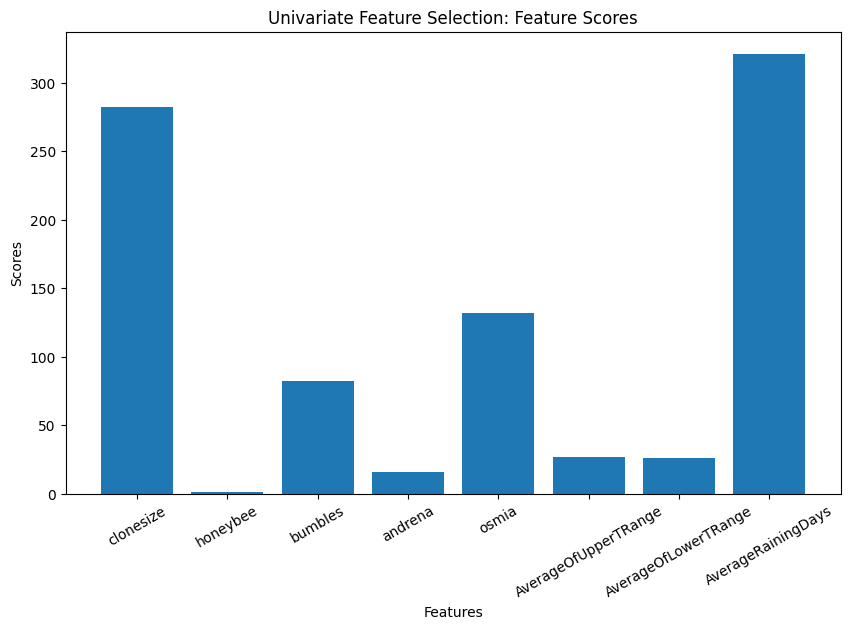

In [18]:
# Feature using SelectKBest - means selecting k(number of features to be specified by us) best features from the wild_blueberry_yield_df dataset.
# Reference: https://medium.com/analytics-vidhya/feature-selection-using-scikit-learn-5b4362e0c19b



# Perform univariate feature selection
feature_selection = SelectKBest(score_func=f_regression, k=5) # instantiating SelectKBest class and selecting 5 features with highest impact
data_fit_transformed = feature_selection.fit(wild_blueberry_df, wild_blueberry_yield) # fitting and transforming dataset and predicting variable to the instance and saving in a variable

# Get the selected feature indices
# Reference : https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html

selected_indices = feature_selection.get_support(indices=True) # Get a mask, or integer index for the features 
# selected_features = [] # empty list to fill with column names
# for bool, feature in zip(selected_indices, wild_blueberry_df.columns): # if boolean value for feature name is true
#     if bool:
#         selected_features.append(feature) # appends the empty list with name of column
# print(selected_indices)

# for i in selected_indices:
#     for j in wild_blueberry_df.columns:
#         if i == j:
#             selected_features.append(j)

# Get the feature scores
scores = feature_selection.scores_

# Plot the feature scores
plt.figure(figsize=(10, 6))
plt.bar(range(len(wild_blueberry_df.columns)), scores, tick_label=wild_blueberry_df.columns)
plt.xticks(rotation=30)
plt.xlabel('Features')
plt.ylabel('Scores')
plt.title('Univariate Feature Selection: Feature Scores')
plt.show();

# **Model Building**

### **ExtraTree Regressor Model**

*Reference : https://www.datatechnotes.com/2020/06/regression-example-with-extratrees-in-python.html*

In [19]:
#  Splitting data into training and testing data

x_train, x_test, y_train, y_test = train_test_split(wild_blueberry_df, wild_blueberry_yield, test_size= 0.25, random_state= 30)

display("x_train sample: ", x_train.sample())
display("x_test sample: ", x_test.sample())

'x_train sample: '

,clonesize,honeybee,bumbles,andrena,osmia,AverageOfUpperTRange,AverageOfLowerTRange,AverageRainingDays
271,12.5,0.25,0.25,0.63,0.5,64.7,45.8,0.39


'x_test sample: '

,clonesize,honeybee,bumbles,andrena,osmia,AverageOfUpperTRange,AverageOfLowerTRange,AverageRainingDays
463,25.0,0.5,0.25,0.38,0.5,79.0,55.9,0.39


In [20]:
# Standardising training data using StandardScalar 

standardising_data = StandardScaler()
x_train_scaled = standardising_data.fit_transform(x_train)
x_test_scaled = standardising_data.fit_transform(x_test)

display("x_train scaled: ", x_train_scaled)
display("x_test scaled: ", x_test_scaled)


'x_train scaled: '

array([[-0.91647161, -0.16891039, -0.45992355, ..., -1.36396432,
        -1.36214243, -0.31914828],
       [-0.91647161, -0.16891039,  1.47060716, ..., -1.36396432,
        -1.36214243,  1.42711587],
       [-0.91647161, -0.16891039, -0.45992355, ...,  0.43060238,
         0.42023238,  0.43756619],
       ...,
       [-0.91647161, -0.16891039, -0.45992355, ..., -0.51252757,
        -0.50808784, -1.25048916],
       [ 0.85675471,  0.05292286, -0.45992355, ..., -1.36396432,
        -1.36214243, -1.25048916],
       [-0.91647161, -0.16891039,  1.47060716, ...,  1.3606333 ,
         1.36711899, -0.31914828]])

'x_test scaled: '

array([[-0.83758081, -0.76669125, -0.58210405, ...,  1.27949184,
         1.28603632,  1.33396013],
       [-0.83758081, -0.76669125, -0.58210405, ..., -1.39584526,
        -1.39227166, -1.39854098],
       [-0.83758081, -0.76669125, -0.58210405, ...,  0.36627581,
         0.35682743, -1.39854098],
       ...,
       [-0.83758081, -0.76669125, -0.58210405, ..., -0.55980241,
        -0.55416168,  0.32412276],
       [-0.83758081, -0.76669125,  1.48432048, ...,  1.27949184,
         1.28603632,  0.32412276],
       [ 1.00170138,  1.19284521, -0.58210405, ..., -1.39584526,
        -1.39227166, -1.39854098]])

In [21]:
# Training the model - ExtraTree Regressor

ext_reg_model = ExtraTreesRegressor(random_state= 32)
ext_model_fit = ext_reg_model.fit(x_train_scaled, y_train)
ext_model_predict = ext_reg_model.predict(x_test_scaled)


ae_dt = mean_absolute_error(y_test, ext_model_predict)
mse_dt = mean_squared_error(y_test, ext_model_predict)
rmse_dt = np.sqrt(mse_dt)
rsq_dt = r2_score(y_test, ext_model_predict)

display('MAE: %.3f' % ae_dt)
display('MSE: %.3f' % mse_dt)
display('RMSE: %.3f' % rmse_dt)
display('R-Square: %.3f' % rsq_dt)


'MAE: 229.753'

'MSE: 84813.916'

'RMSE: 291.228'

'R-Square: 0.953'

**XGBoost Regressor Model**

*Reference : https://machinelearningmastery.com/xgboost-for-regression/*

In [22]:
# Training Model - XGBoost Regressor

xgb_model = XGBRegressor()
xgb_model_fit = xgb_model.fit(x_train_scaled,y_train)
xgb_model_predict = xgb_model.predict(x_test_scaled)

ae_dt = mean_absolute_error(y_test, xgb_model_predict)
mse_dt = mean_squared_error(y_test, xgb_model_predict)
rmse_dt = np.sqrt(mse_dt)
rsq_dt = r2_score(y_test, xgb_model_predict)

display('MAE: %.3f' % ae_dt)
display('MSE: %.3f' % mse_dt)
display('RMSE: %.3f' % rmse_dt)
display('R-Square: %.3f' % rsq_dt)


'MAE: 694.858'

'MSE: 822708.962'

'RMSE: 907.033'

'R-Square: 0.546'

# **Model Evaluation**

**Cross validation (CV) evaluation** 

*Reference : https://www.markovml.com/blog/model-evaluation-metrics*

*Reference : https://www.w3schools.com/python/python_ml_cross_validation.asp*

In [23]:
k_folds = KFold(n_splits = 5)

cross_val_scores = cross_val_score(ext_reg_model, x_train_scaled, y_train, cv = k_folds)

print("Cross Validation Scores: ", cross_val_scores)
print("Average CV Score: ", cross_val_scores.mean())
print("Number of CV Scores used in Average: ", len(cross_val_scores))

Cross Validation Scores:  [0.94931096 0.96407304 0.95749402 0.92352413 0.86815803]
Average CV Score:  0.9325120359637001
Number of CV Scores used in Average:  5


# **Explainable AI**

In [24]:
# creating our sample set from x_train data as running shap is resource expensive

sample_set = x_train.sample(10)

In [25]:
# Initiating "Explainer" class of Shapely library
# Reference : https://shap.readthedocs.io/en/latest/generated/shap.Explainer.html

explain_prediction = shap.Explainer(xgb_model)

In [26]:
# Fitting our sample set in the Explainer class and generating shap values

shap_values = explain_prediction(sample_set,check_additivity=False)

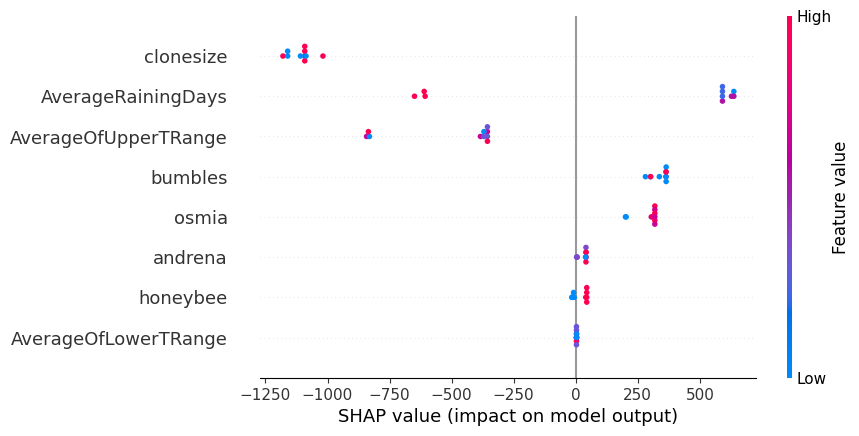

In [27]:
# Plotting beeswarm graph
# Reference : https://shap.readthedocs.io/en/latest/example_notebooks/api_examples/plots/beeswarm.html

shap.plots.beeswarm(shap_values)

In [28]:
# # Instantiating TreeExplainer class of shap. This is a specific class for decision tree models to be used for shap plots 

explain_prediction_1 = shap.TreeExplainer(ext_reg_model, feature_names= x_train.columns)



In [29]:
# Explainable AI for individual instances - force plot
# Reference : https://maxsteele731.medium.com/shap-force-plots-for-classification-d30be430e195
#  reference : https://shap.readthedocs.io/en/latest/example_notebooks/tabular_examples/tree_based_models/Force%20Plot%20Colors.html

choose_an_instance = sample_set.iloc[0,:] # choosing an individual instance
shap_values_fp = explain_prediction_1.shap_values(choose_an_instance) # passing a the chosen instance parameter to our explainer object so as generate the shap value 

In [30]:
# Reference : https://shap.readthedocs.io/en/latest/generated/shap.plots.force.html

shap.plots.force(explain_prediction_1.expected_value, shap_values_fp, feature_names= wild_blueberry_df.columns)

# **WebApp Deployment**

*Reference : https://docs.streamlit.io/get-started/tutorials/create-an-app*

### **Saving the model for deployment**

We need to save the model (here we have two so we can choose anyone) for deployment. This will be a `df.joblib` file. Then we will load it and then use it for prediction via front-end, that is user-interface.

In [33]:
# Saving the model

joblib.dump(ext_reg_model, "extra_tree_model.joblib")

['extra_tree_model.joblib']

In [34]:
#  Loading the model

load_model = joblib.load("extra_tree_model.joblib")

Note : Once we have a joblib file we can share the same with anyone and this can be used on any system to make prediction after loading all the libraries that were used in building this model.

We will need to create python scripts for the preprocessing part, such as one-hot encoding or so. Thus it is better to create functions of these processes while preprocessing data so that they can be used in the python script file. a new `.py` file has to be created where these functions have to be stored. We will save these functions in `def_fuction.joblib` format as well

In [35]:
#  Making prediction using the model

load_model.predict(x_test_scaled)

array([4603.12243286, 6747.20302419, 7326.23219758, 4658.61599601,
       7323.08666744, 5672.53867935, 4181.86090715, 7396.08920769,
       5545.51455365, 6971.6757116 , 5633.82354394, 6050.38681017,
       6137.57997238, 6526.37463306, 7620.64348493, 3141.57527815,
       6484.23044119, 7214.75557218, 6984.7820408 , 6313.21086637,
       5711.69262512, 5716.24891708, 4938.26398587, 4601.20780372,
       5038.41291305, 7014.53261094, 5373.76175891, 8120.47477101,
       5498.86049408, 3810.39669788, 6715.99416101, 5847.54400542,
       5300.72935735, 6164.52728483, 6896.69634344, 4690.77941632,
       4407.05362711, 4486.01284463, 6616.55778858, 7669.33852889,
       7709.3661652 , 3438.2826054 , 5802.16827962, 6525.3881339 ,
       4565.50534899, 5769.75049318, 5381.4335893 , 7377.6253608 ,
       7441.93056207, 5916.28344082, 6629.21843116, 7003.44677534,
       4536.08333892, 4272.4050501 , 5985.760361  , 4184.51623866,
       7129.42491973, 4585.68523064, 2726.97079787, 3824.79820